In [54]:
import matplotlib.pyplot as plt
import numpy as np

import InputList
import BinaryReader
import Preprocessor
import tensorflow as tf
import models
from importlib import reload

prediction_file = InputList.diabetic_training_files[2]

reload(InputList)
reader = BinaryReader.BinaryReader()
test_dataset = reader.create_test_dataset([prediction_file])
preprocessor = Preprocessor.Preprocessor(test_dataset)
print(prediction_file)
for sample in test_dataset.take(3):
    print(sample[1])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


('/mnt/p_Zeiss/Projects/UWF OCTA/Clinical data/MOON1/D108/rechts/raw_1536x2048x2045x2_20962.bin',
 1)

In [57]:
with tf.device('/gpu:0'):
    model = tf.keras.models.load_model("savedModels/first_with_all_data")
    output_test_diabetic_4 = model.predict(
        test_dataset.batch(4),
        verbose = 1,
        use_multiprocessing=True
    )

100/100 [==============================] - 384s 4s/step


In [ ]:
with tf.device('/gpu:0'):
    normalization_layer = preprocessor.normalize_layer()
    model = models.RawClassifier().model()(test_dataset.element_spec[0].shape, normalization_layer, reconstruction=False)

    model.load_weights('checkpoints/best_model')
    output_test = model.predict(
        test_dataset.batch(4),
        verbose = 1,
        use_multiprocessing=True
    )

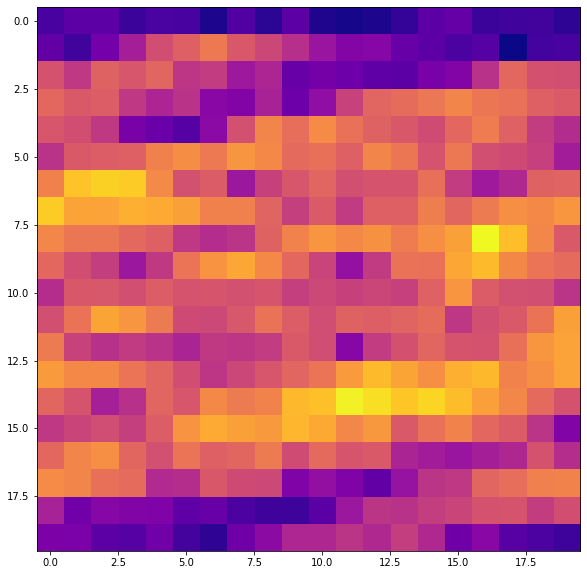

In [70]:
fig = plt.figure(figsize=(20, 10))
plt.imshow(output_test_diabetic_4.reshape((20, 20)), cmap="plasma")

In [69]:
import Visualization
reload(Visualization)
vsz = Visualization.ImageVisualizer(output_test_diabetic_4, instance_size=(102, 102, 20, 20), background_image_path=
                                Visualization.ImageVisualizer.raw_path_to_image(prediction_file[0]))
vsz.plot_results_map(name="diabetic_test_full_data")

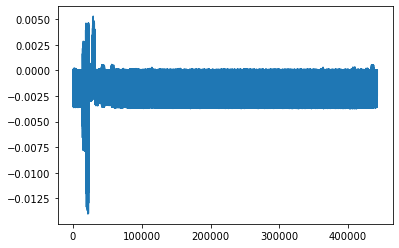

In [75]:
import matplotlib.pyplot as plt
plt.plot(model.layers[-1].get_weights()[0].flatten())